<a href="https://colab.research.google.com/github/hosankang/AI_Class/blob/master/Regularizations2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Activation
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
                        "Sandal",     "Shirt",  "Sneaker", "Bag",  "Ankle boot"]

#데이터 전처리
x_train = x_train / 255.0
x_test = x_test / 255.0

# Batch Normalization 기법


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.6270 - acc: 0.8292 - val_loss: 0.4964 - val_acc: 0.8578
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.4338 - acc: 0.8667 - val_loss: 0.4673 - val_acc: 0.8470
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3750 - acc: 0.8791 - val_loss: 0.4227 - val_acc: 0.8485
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3342 - acc: 0.8873 - val_loss: 0.3939 - val_acc: 0.8640
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3123 - acc: 0.8940 - val_loss: 0.4592 - val_acc: 0.8430
Epoch 6/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2956 - acc: 0.8976 - val_loss: 0.4003 - val_acc: 0.8683
Epoch 7/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2757 - acc: 0.9038 - val_loss: 0.3550 - val_acc

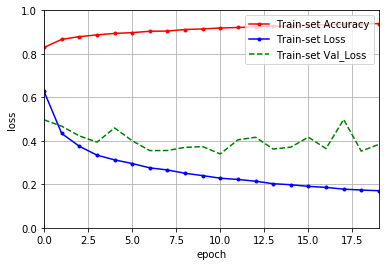

In [14]:
#레이어 설정(크기 28, 28, relu Activation)
model_batch = Sequential()
model_batch.add(Flatten(input_shape=(28, 28)))
model_batch.add(Dense(128))
model_batch.add(BatchNormalization())
model_batch.add(Activation('relu'))
model_batch.add(Dense(10))
model_batch.add(BatchNormalization())
model_batch.add(Activation('softmax'))

#컴파일(Adam Optimizer, Cross Entropy)
model_batch.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#훈련 
history_batch = model_batch.fit(x_train, y_train,batch_size=64,validation_data=(x_test,y_test),epochs=20)

# 테스트 셋을 통해 모델 평가 및 정확도
score = model_batch.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#epochs당 loss 변화 그래프

plt.figure('Batch Normalization')

y_acc_batch = history_batch.history['acc']
y_loss_batch = history_batch.history['loss']
val_loss_batch = history_batch.history['val_loss']

x_len = np.arange(len(y_loss_batch))
plt.plot(x_len, y_acc_batch, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_batch, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_batch, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,1])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


#Dropout 기법

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.8527 - acc: 0.6907 - val_loss: 0.5540 - val_acc: 0.7840
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.6184 - acc: 0.7762 - val_loss: 0.4873 - val_acc: 0.8262
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.5691 - acc: 0.7918 - val_loss: 0.4603 - val_acc: 0.8372
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.5476 - acc: 0.7997 - val_loss: 0.4462 - val_acc: 0.8407
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.5310 - acc: 0.8054 - val_loss: 0.4374 - val_acc: 0.8416
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.5208 - acc: 0.8067 - val_loss: 0.4241 - val_acc: 0.8471
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.5078 - acc: 0.8108 - val_loss: 0.4238 - val_acc

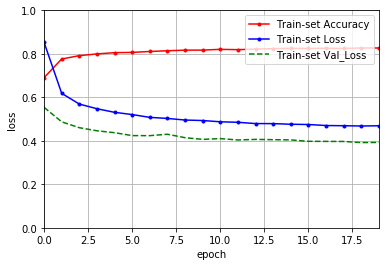

In [15]:
#레이어 설정 (입력과 히든레이어에 각각 0.5씩 드롭아웃 시켜준다
model_drop = Sequential()
model_drop.add(Flatten(input_shape=(28, 28)))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(128,activation='relu'))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(10,activation='softmax'))

#컴파일(Adam Optimizer, Cross Entropy)
model_drop.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#훈련 
history_drop = model_drop.fit(x_train, y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

# 테스트 셋을 통해 모델 평가 및 정확도
score = model_drop.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#epochs당 loss 변화 그래프

plt.figure('Dropout')

y_acc_drop = history_drop.history['acc']
y_loss_drop = history_drop.history['loss']
val_loss_drop = history_drop.history['val_loss']

x_len = np.arange(len(y_loss_drop))
plt.plot(x_len, y_acc_drop, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_drop, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_drop, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,1])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#Data Augmentation 기법

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.4482 - acc: 0.0625 - val_loss: 2.2406 - val_acc: 0.1325
Epoch 2/200
1/1 [==============================] - 0s 281ms/step - loss: 2.2295 - acc: 0.1094 - val_loss: 2.1559 - val_acc: 0.1425
Epoch 3/200
1/1 [==============================] - 0s 271ms/step - loss: 2.2035 - acc: 0.1875 - val_loss: 2.0957 - val_acc: 0.1726
Epoch 4/200
1/1 [==============================] - 0s 290ms/step - loss: 2.1252 - acc: 0.1562 - val_loss: 2.0163 - val_acc: 0.2306
Epoch 5/200
1/1 [==============================] - 0s 290ms/step - loss: 1.9718 - acc: 0.3125 - val_loss: 1.9421 - val_acc: 0.3132
Epoch 6/200
1/1 [==============================] - 0s 288ms/step - loss: 1.9836 - acc: 0.3438 - val_loss: 1.8679 - val_acc: 0.3698
Epoch 7/200
1/1 [==============================] - 0s 290ms/step - loss: 1.8220 - acc: 0.4375 - val_loss: 1.7906 - val_acc: 0.4092
Epoch 8/200
1/1 [==============================] - 0s 285ms/step - loss: 1.8050 - acc:

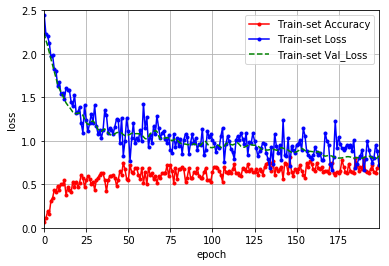

In [16]:
#데이터 확장
dataAug = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
           height_shift_range=0.2, shear_range=0.2,horizontal_flip=True)
x_train_DA=x_train.reshape(x_train.shape[0],1,28,28) #차원을 3에서 4로 확장
x_test_DA=x_test.reshape(x_test.shape[0],1,28,28)

#레이어 설정
model_DA = Sequential()
model_DA.add(Flatten(input_shape=(1,28, 28)))
model_DA.add(Dense(128,activation='relu'))
model_DA.add(Dense(10,activation='softmax'))

#컴파일
model_DA.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#확장된 데이터 훈련하기
history_DA = model_DA.fit_generator(dataAug.flow(x_train_DA,y_train,batch_size=64),steps_per_epoch=1, epochs=200,validation_data=(x_test_DA,y_test))

# 테스트 셋을 통해 모델 평가 및 정확도
score = model_DA.evaluate(x_test_DA, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#epochs당 loss 변화 그래프
plt.figure('Data Augmentation')
y_acc_DA = history_DA.history['acc']
y_loss_DA = history_DA.history['loss']
val_loss_DA = history_DA.history['val_loss']

x_len = np.arange(len(y_loss_DA))
plt.plot(x_len, y_acc_DA, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_DA, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_DA, 'g--', label="Train-set Val_Loss")

plt.axis([0,199,0,2.5])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



#Ensemble 기법

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.5207 - acc: 0.8203 - val_loss: 0.4409 - val_acc: 0.8451
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3846 - acc: 0.8640 - val_loss: 0.4150 - val_acc: 0.8518
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3456 - acc: 0.8754 - val_loss: 0.3754 - val_acc: 0.8661
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3187 - acc: 0.8836 - val_loss: 0.3623 - val_acc: 0.8669
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3034 - acc: 0.8892 - val_loss: 0.3499 - val_acc: 0.8739
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2869 - acc: 0.8959 - val_loss: 0.3380 - val_acc: 0.8803
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2750 - acc: 0.8996 - val_loss: 0.3397 - val_acc

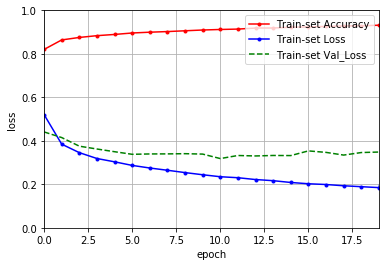

In [17]:
#모델 3개를 독립적으로 만듬
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation='softmax'))

model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(10,activation='softmax'))

model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(10,activation='softmax'))

#3개 모델 컴파일
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#3개 모델 훈련 및 히스토리 정보

history1 = model1.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))
history2 = model2.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))
history3 = model3.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))

# 테스트 셋을 통해 모델 평가 및 정확도
score1 = model1.evaluate(x_test, y_test, verbose=0)
score2 = model2.evaluate(x_test, y_test, verbose=0)
score3 = model3.evaluate(x_test, y_test, verbose=0)

print('Test accuracy1:', score1[1])
print('Test accuracy2:', score2[1])
print('Test accuracy3:', score3[1])

#predict한 값들을 더한 후 나눠서 실제 테스트 라벨과 비교 카운트 후 정확도 측정
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions3 = model3.predict(x_test)
predictions = (predictions1 + predictions2 + predictions3)/3.0

count = 0
for i in range(0,10000):
    predictions_label = np.argmax(predictions[i])
    if predictions_label == y_test[i]:
        count= count+1
    i = i+1
count= count/10000.0
print('Total accuracy: ', count)

#epochs당 loss 변화 그래프
plt.figure('Ensemble')

y_acc_En = (history1.history['acc'] + history2.history['acc'] + history3.history['acc'])
y_loss_En = (history1.history['loss'] + history2.history['loss']+history3.history['loss'])
val_loss_En = (history1.history['val_loss']+history2.history['val_loss']+history3.history['val_loss'])

x_len = np.arange(len(y_loss_En))
plt.plot(x_len, y_acc_En, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_En, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_En, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,1])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#Early Stopping 기법 
### 많은 시간을 들여 도전해 봤지만.. 이번에는 성공하지 못해서 일단은 callback방식을 사용했습니다.
### 다음에 callback을 사용하지 않고 풀수 있도록 도전해 보겠습니다. 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.5172 - acc: 0.8192 - val_loss: 0.4443 - val_acc: 0.8465
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3860 - acc: 0.8621 - val_loss: 0.4056 - val_acc: 0.8558
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3456 - acc: 0.8746 - val_loss: 0.3927 - val_acc: 0.8570
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3223 - acc: 0.8824 - val_loss: 0.3571 - val_acc: 0.8739
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3043 - acc: 0.8888 - val_loss: 0.3542 - val_acc: 0.8711
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2901 - acc: 0.8930 - val_loss: 0.3473 - val_acc: 0.8740
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2740 - acc: 0.8978 - val_loss: 0.3492 - val_acc

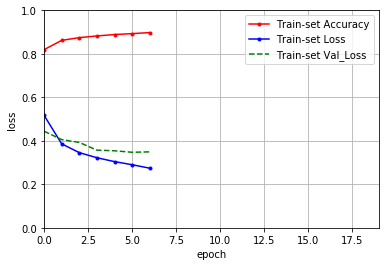

In [18]:
#콜백함수 사용ㅠㅠ
from keras.callbacks import EarlyStopping 

#레이어 설정(크기 28, 28, relu Activation)
model_ES = Sequential()
model_ES.add(Flatten(input_shape=(28, 28)))
model_ES.add(Dense(128,activation='relu'))
model_ES.add(Dense(10,activation='softmax'))

#Early_stopping
early_stopping = EarlyStopping()

#컴파일(Adam Optimizer, Cross Entropy)
model_ES.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#훈련
history_ES = model_ES.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test),callbacks=[early_stopping])

# 테스트 셋을 통해 모델 평가 및 정확도
score = model_ES.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#epochs당 loss 변화 그래프
plt.figure('Early Stopping')

y_acc_ES = history_ES.history['acc']
y_loss_ES = history_ES.history['loss']
val_loss_ES = history_ES.history['val_loss']

x_len = np.arange(len(y_loss_ES))
plt.plot(x_len, y_acc_ES, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_ES, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_ES, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,1])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

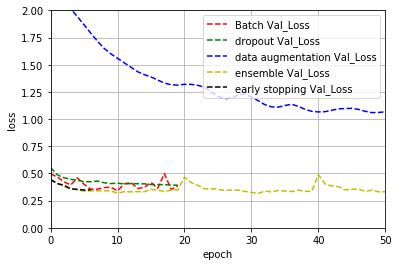

In [20]:
#전체 그래프

plt.figure('전체 loss 비교')
x_len_batch=np.arange(len(val_loss_batch))
x_len_drop=np.arange(len(val_loss_drop))
x_len_DA=np.arange(len(val_loss_DA))
x_len_En=np.arange(len(val_loss_En))
x_len_ES=np.arange(len(val_loss_ES))
plt.plot(x_len_batch, val_loss_batch, 'r--', label="Batch Val_Loss")
plt.plot(x_len_drop, val_loss_drop, 'g--', label="dropout Val_Loss")
plt.plot(x_len_DA, val_loss_DA, 'b--', label="data augmentation Val_Loss")
plt.plot(x_len_En, val_loss_En, 'y--', label="ensemble Val_Loss")
plt.plot(x_len_ES, val_loss_ES, 'k--', label="early stopping Val_Loss")
plt.axis([0,50,0,2])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
